In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt
from math import exp

In [94]:
image = cv2.imread("images/skeleton.jpg")
image.shape

(1351, 845, 3)

Text(0.5, 1.0, 'Original Image')

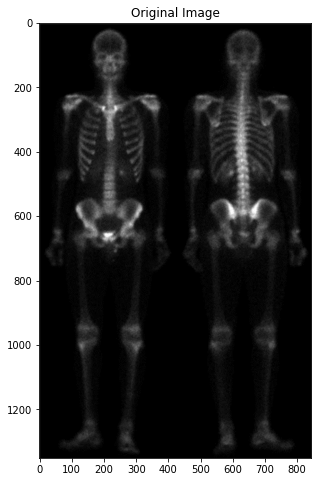

In [95]:
plt.figure(figsize=(10, 8))
plt.imshow(image, "gray")
plt.title("Original Image")

### Function for converting to grayscale

This function converts the colored image of MN pixel to Grayscale

Converts (M x N x 3) matrix to (M x N) matrix by the dot product with a (3 x 1) matrix such as [0.2989, 0.5870, 0.1140]

In [89]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

### Function for applying median filter

In [62]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

In [90]:
# gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_img = rgb2gray(image)

In [91]:
denoisy_img = median_filter(gray_img,3)

Text(0.5, 1.0, 'De-Noised Image')

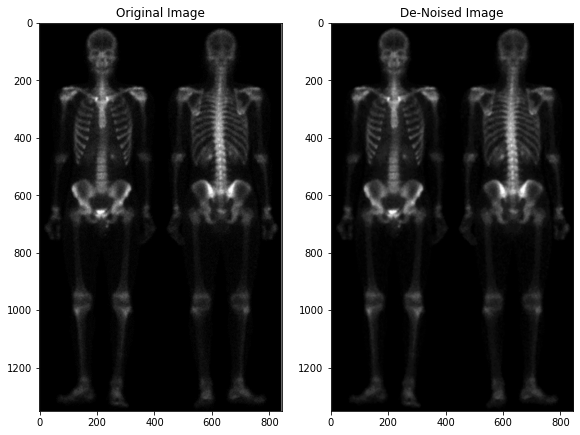

In [97]:
plt.figure(figsize=(20, 16))

plt.subplot(141)
plt.imshow(image, "gray")
plt.title("Original Image")

plt.subplot(142)
plt.imshow(denoisy_img, "gray")
plt.title("De-Noised Image")


In [16]:
denoisy_img = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)

Text(0.5, 1.0, 'De-noised Image')

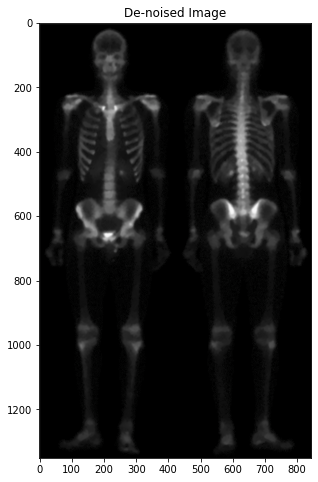

In [17]:
plt.figure(figsize=(10, 8))
plt.imshow(denoisy_img, "gray")
plt.title("De-noised Image")

In [18]:
gray_img = cv2.cvtColor(denoisy_img, cv2.COLOR_BGR2GRAY)

In [19]:
print(gray_img.shape)

(1351, 845)


In [20]:
eq_img = cv2.equalizeHist(gray_img)

In [21]:
# x = cv2.GaussianBlur(image, (21, 21), 3)+127
# x = cv2.GaussianBlur(eq_img, (21, 21), 3) 

# plt.figure(figsize=(10, 8))
# plt.imshow(x, "gray")

In [22]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

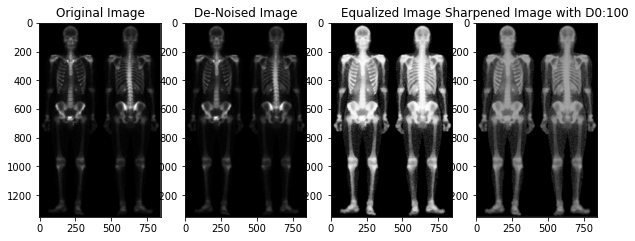

In [25]:
d0 = 100

# perform FFT
original = np.fft.fft2(eq_img)
# get spectrum
center = np.fft.fftshift(original)
# center spectrum for high pass
HighPassCenter = center * gaussianHP(d0,eq_img.shape)
# perform high pass
HighPass = np.fft.ifftshift(HighPassCenter)
# reverse FFT -> IFFT
inverse_HighPass = np.fft.ifft2(HighPass)
# add filter to original image
sharpened = eq_img+np.abs(inverse_HighPass)


plt.figure(figsize=(10, 8))


plt.subplot(141)
plt.imshow(image, "gray")
plt.title("Original Image")

plt.subplot(142)
plt.imshow(gray_img, "gray")
plt.title("De-Noised Image")

plt.subplot(143)
plt.imshow(eq_img, "gray")
plt.title("Equalized Image")

plt.subplot(144)
plt.imshow(sharpened,cmap="gray")
plt.title("Sharpened Image with D0:"+str(d0))
plt.show()

In [31]:
plt.figure(figsize=(10, 8))
#plt.figure(figsize=(25, 5), constrained_layout=False)
#plt.subplot(111), plt.imshow((denoisy_img), "gray"), plt.title("Spectrum")
plt.subplot(112), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")
# plt.subplot(113), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")
# plt.subplot(121), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")
# plt.subplot(122), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")


plt.show()

ValueError: num must be 1 <= num <= 1, not 2

<Figure size 720x576 with 0 Axes>

In [ ]:
hpf_img = gray - cv2.GaussianBlur(eq_img, (21, 21), 3)

In [ ]:
plt.figure(figsize=(20, 16))
plt.imshow(hpf_img, 'gray')

### Apply laplacian blur

In [ ]:
# laplacian = cv2.Laplacian(gray, cv2.CV_64F)
# plt.figure(figsize=(20, 16))
# plt.imshow(laplacian, cmap='gray')


In [ ]:
# sobel x filter where dx=1 and dy=0
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=7)
  
# sobel y filter where dx=0 and dy=1
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=7)
  
# combine sobel x and y
sobel = cv2.bitwise_and(sobelx, sobely)
  
# plot images
plt.subplot(2, 2, 1)

  
plt.subplot(2, 2, 2)
plt.figure(figsize=(20, 16))
plt.imshow(sobelx, cmap='gray')
plt.title('SobelX')
  
plt.subplot(2, 2, 3)
plt.figure(figsize=(20, 16))
plt.imshow(sobely, cmap='gray')
plt.title('SobelY')
  
plt.subplot(2, 2, 4)
plt.figure(figsize=(20, 16))
plt.imshow(sobel, cmap='gray')
plt.title('Sobel')
  
plt.show()

In [ ]:
!pip3 install scikit-image

In [ ]:
from skimage import io
from skimage import color
from skimage.restoration import denoise_nl_means, estimate_sigma

from math import sqrt
from math import exp

In [ ]:
img = io.imread("images/skeleton.jpg")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()

In [ ]:
img.shape

In [ ]:
img = rgb2gray(img)

In [ ]:
img.shape[:2]

In [81]:
x = np.array([[[1,1,1],[2,2,2]],[[3,3,3],[4,4,4]],[[5,5,5],[6,6,6]]])
x.shape

(3, 2, 3)

In [82]:
y = x[...,:3]

In [86]:
y.shape

(3, 2, 3)

In [84]:
z = np.dot(y,[1,0,1])

In [87]:
z.shape

(3, 2)

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


In [ ]:
def try_d0s_hp(d0):
    #plt.figure(figsize=(25, 5), constrained_layout=False)


    #plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

    original = np.fft.fft2(img)
    #plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

    center = np.fft.fftshift(original)
    #plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

    HighPassCenter = center * gaussianHP(d0,img.shape)
    #plt.subplot(164), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

    HighPass = np.fft.ifftshift(HighPassCenter)
    #plt.subplot(165), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

    inverse_HighPass = np.fft.ifft2(HighPass)
    #plt.subplot(166), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

    #plt.suptitle("D0:"+str(d0),fontweight="bold")
    #plt.subplots_adjust(top=1.1)
    #plt.show()
    
    plt.figure(figsize=(10, 8))
    plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")
    plt.show()

In [ ]:
# for i in [50, 20, 5]:
#     try_d0s_hp(i)

In [ ]:
try_d0s_hp(5)

In [ ]:
d0 = 5

# perform FFT
original = np.fft.fft2(img)
# get spectrum
center = np.fft.fftshift(original)
# center spectrum for high pass
HighPassCenter = center * gaussianHP(d0,img.shape)
# perform high pass
HighPass = np.fft.ifftshift(HighPassCenter)
# reverse FFT -> IFFT
inverse_HighPass = np.fft.ifft2(HighPass)
# add filter to original image
sharpened = img+np.abs(inverse_HighPass)


plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, "gray")
plt.title("Original Image")

plt.subplot(122)
plt.imshow(sharpened,cmap="gray")
plt.title("Sharpened Image with D0:"+str(d0))
plt.show()